# Business Problem
- **The main objective of the project was to develop a predictive model to identify whether a woman has Polycystic Ovary Syndrome (PCOS) based on clinical and diagnostic features.**
- **PCOS is a common health condition, and early detection can help in timely treatment and lifestyle changes.**


# Data Understanding

In [1]:
import  pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import boxcox
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("data_with_diseases.csv")
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 41,Diabetes,Hypertension,Infertility,stressLevel
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,5,7.0,0,0,1.99,1.99,36,30,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN,0,0,0,1
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,5,11.0,1,0,60.80,1.99,38,32,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN,0,0,0,2
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,5,10.0,1,0,494.08,494.08,40,36,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN,1,1,0,3
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,5,4.0,0,0,1.99,1.99,42,36,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN,0,0,0,2
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,5,1.0,1,0,801.45,801.45,37,30,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN,0,0,0,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [4]:
s = df.isnull().sum()
s[s>0]

Marraige Status (Yrs)      1
Fast food (Y/N)            1
Unnamed: 41              539
dtype: int64

### `Observations :` 
- SI. no, Patient File No are unique                             ---> DROP
- Unnamed: 41 irrelevent data and has only two values filled.    ---> DROP
- Fast food contains 1 null value
- Marraige Status (Yrs) contains 1 null value
- AMH(ng/mL) is of object type

In [5]:
df.columns = df.columns.str.strip()

In [6]:
df.drop(columns = ['Sl. No', 'Patient File No.',"Unnamed: 41"],inplace = True)

In [7]:
continous  = ['Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)', 'Marraige Status (Yrs)', 'Cycle length(days)','I   beta-HCG(mIU/mL)',
              "II    beta-HCG(mIU/mL)", 'Waist:Hip Ratio' ,'Hip(inch)', 'Waist(inch)', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',  'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)',
              'BP _Diastolic (mmHg)','Follicle No. (L)', 'Follicle No. (R)','Avg. F size (L) (mm)', 'Avg. F size (R) (mm)','Endometrium (mm)', ]
discrete = ["Cycle(R/I)",'No. of aborptions', 'stressLevel']
categorical = ['PCOS (Y/N)', 'Blood Group','Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', "Reg.Exercise(Y/N)", 'Diabetes',  'Hypertension','Infertility', ]

# Data Preprocessing

### Continous variables 

In [8]:
# Treating Wrong Data
a = df["AMH(ng/mL)"].str.isalpha()
a[a[:] == True]

305    True
Name: AMH(ng/mL), dtype: bool

In [9]:
# Missing values 
df["Marraige Status (Yrs)"].fillna(df["Marraige Status (Yrs)"].mean(),inplace = True)

In [10]:
df.loc[[305],"AMH(ng/mL)"] = None
# Treating Wrong Data Type
df["AMH(ng/mL)"] = df["AMH(ng/mL)"].astype(float)
df["AMH(ng/mL)"].fillna(df["AMH(ng/mL)"].mean(),inplace = True)

In [11]:
# Checkinng For Duplicated Records
df[continous].duplicated().sum()

np.int64(0)

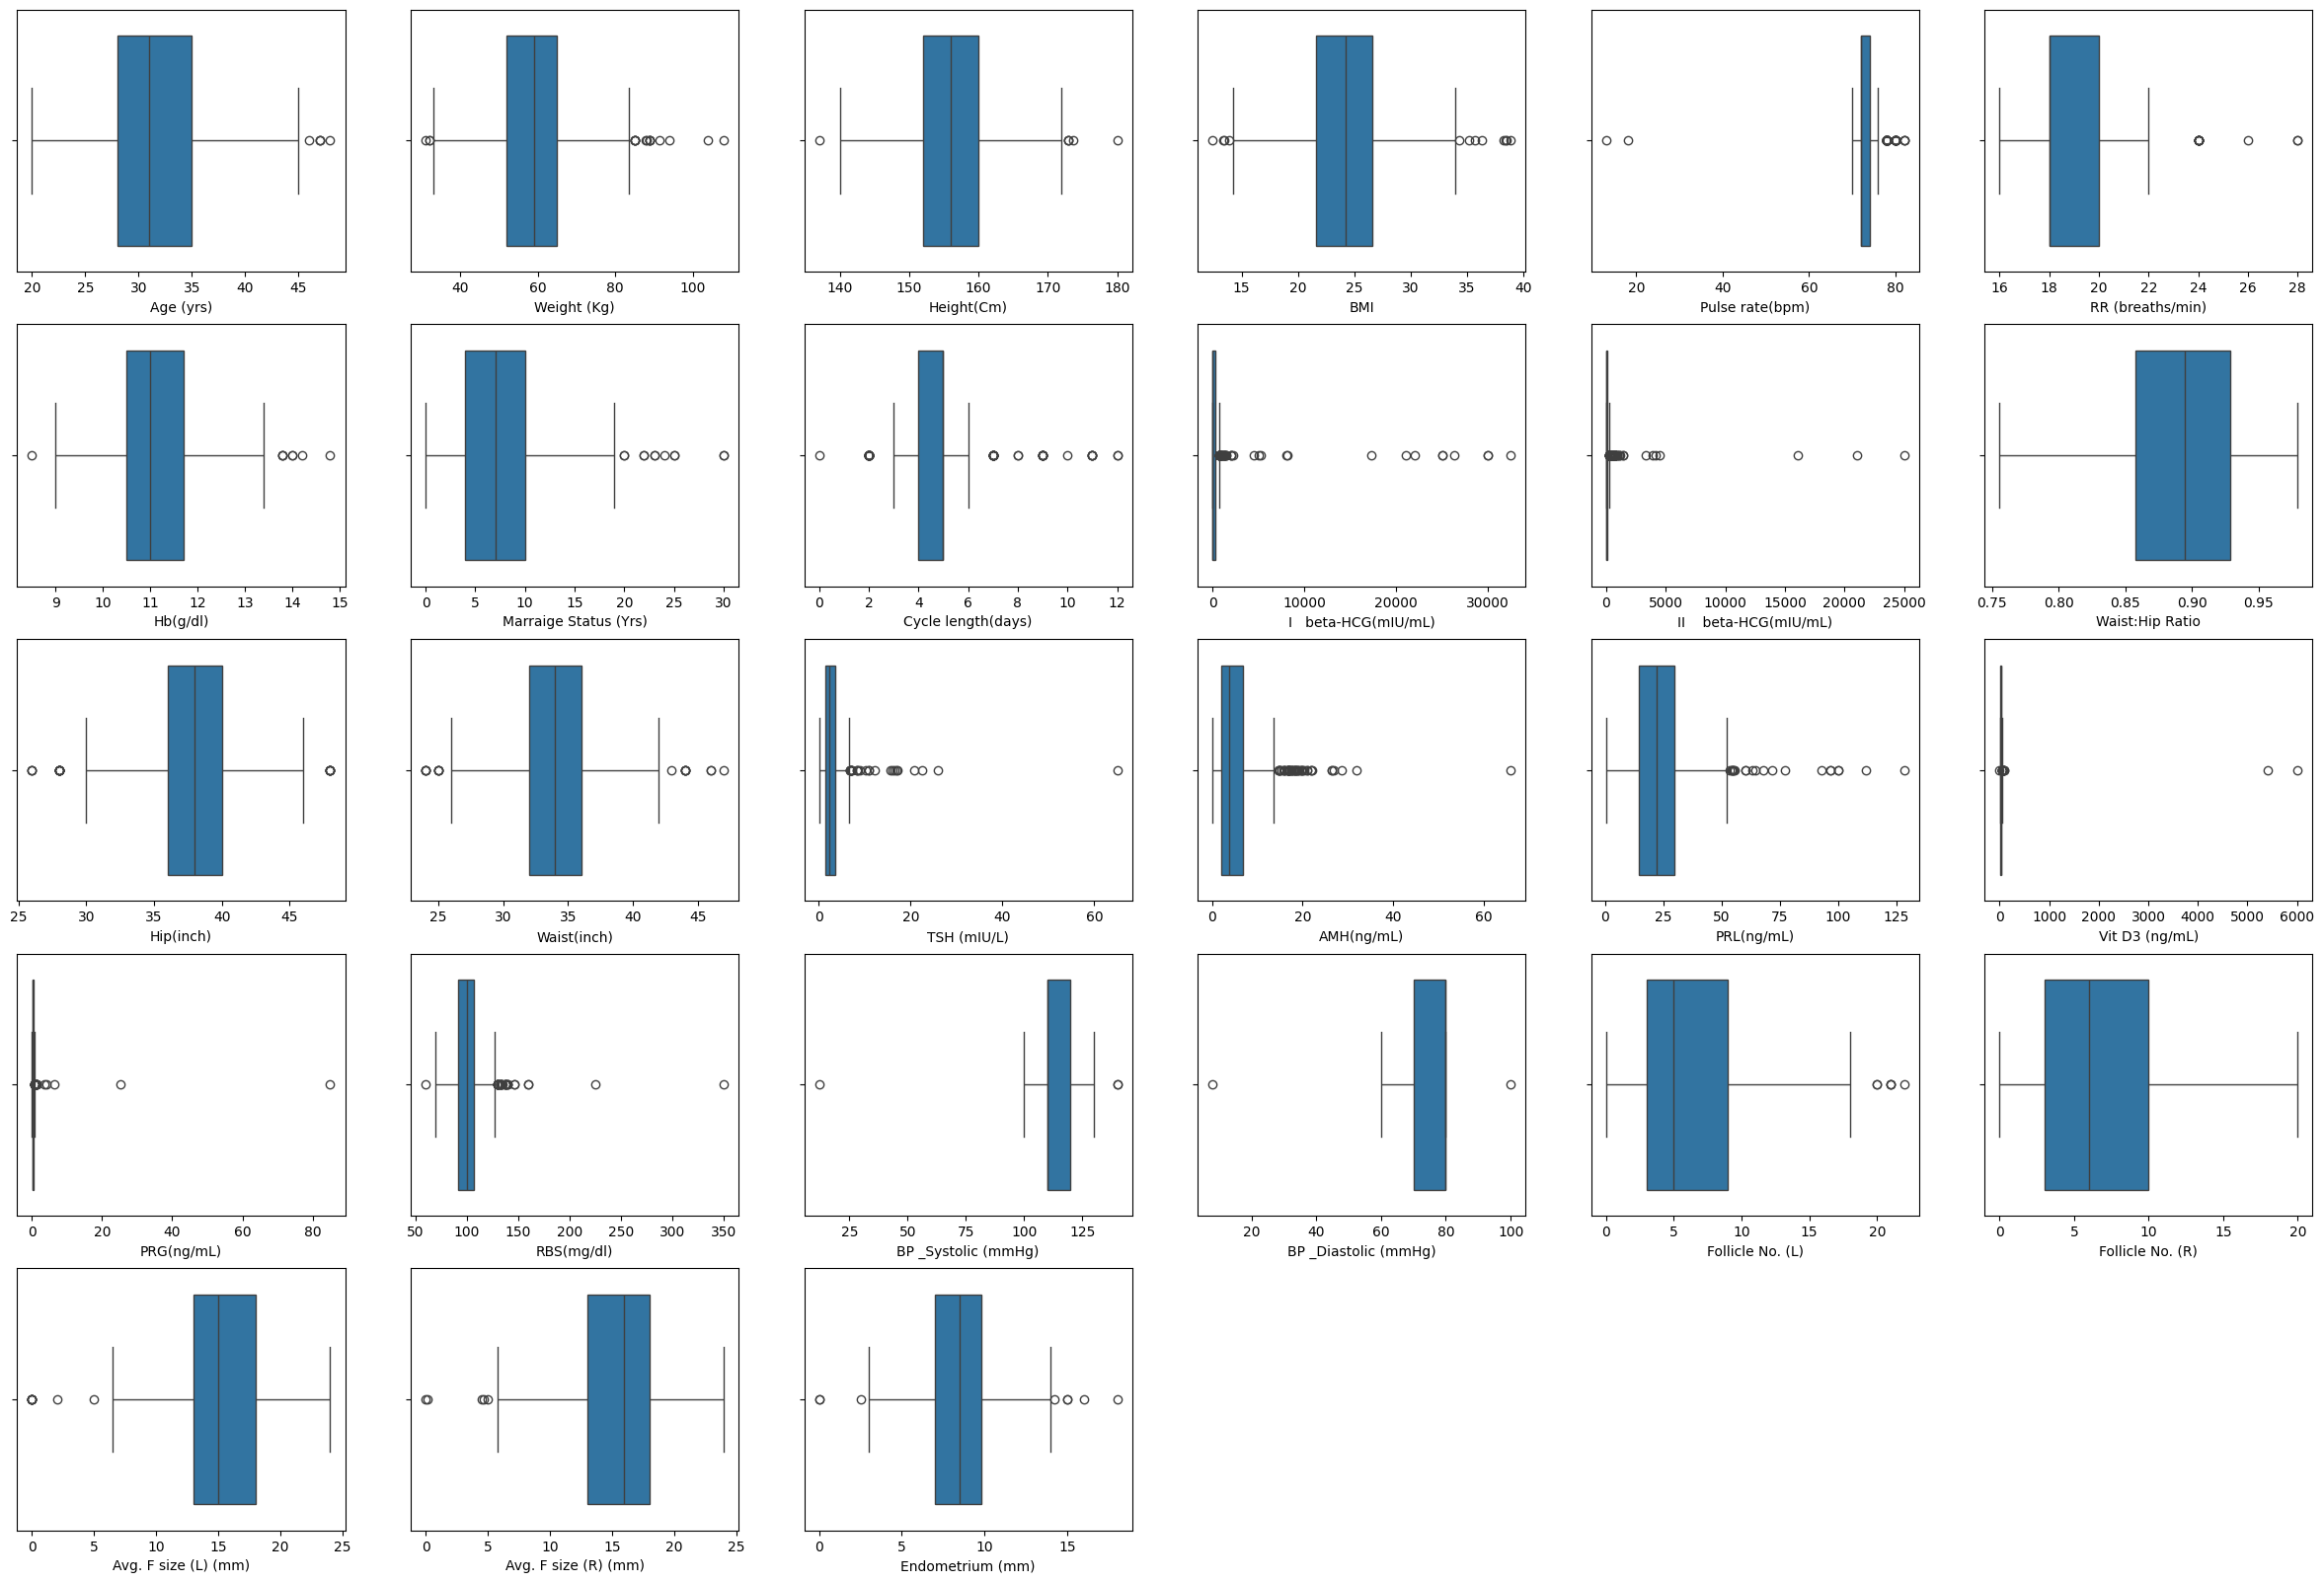

In [12]:
# Outliers
plt.figure(figsize = (30,20))
for i in range (len(continous)):
    plt.subplot(5,6,i+1)
    sns.boxplot(x = df[continous[i]])
plt.show()

### `Observation`
 
- **Most of the values are with in the range.**

- **Some values are out of the range but they can be the key indicators for DISEASED persons.**


In [13]:
# Manually Checking Outliers
Variable = 'Age (yrs)'

Min,Q1,Q2,Q3,Max = df[Variable].quantile([0,0.25,0.50,0.75,1])
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df[(df[Variable]>upper_limit) | (df[Variable] < lower_limit)]

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Diabetes,Hypertension,Infertility,stressLevel
252,1,47,62.7,154.0,26.437848,15,72,18,10.0,4,4,30.0,1,2,25000.00,25000.00,38,36,0.947368,2.47,6.20,31.47,12.1,0.25,92.0,1,1,1,1,0,0.0,0,110,80,14,11,16.0,19.0,9.3,1,1,1,3
318,0,47,60.0,164.5,22.200000,13,72,18,13.0,2,5,24.0,1,0,479.60,479.60,36,32,0.888889,5.89,3.33,13.78,35.4,0.41,100.0,0,0,0,1,1,1.0,0,110,80,6,6,15.0,18.0,8.4,0,0,0,1
447,1,47,62.7,160.0,24.500000,15,72,18,10.0,4,7,30.0,0,0,30007.00,1.99,39,36,0.923077,2.47,6.20,31.47,12.1,0.25,92.0,0,0,0,0,1,1.0,1,110,80,14,11,20.0,19.0,6.0,1,1,1,5
474,0,48,55.0,151.0,24.100000,15,70,18,9.4,4,2,25.0,0,0,4983.21,127.20,38,36,0.947368,0.45,4.02,27.72,29.2,0.30,91.0,0,0,0,0,1,0.0,1,130,80,9,10,18.0,19.0,9.0,0,0,0,2
509,1,46,54.0,152.0,23.400000,13,74,20,14.0,2,4,16.0,1,1,856.11,1.99,30,28,0.933333,1.13,16.60,8.10,23.7,0.29,92.0,1,0,0,0,0,1.0,0,120,70,20,18,18.0,17.0,7.8,1,1,1,5


In [14]:
df[continous].describe()

,Age (yrs),Weight (Kg),Height(Cm),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Marraige Status (Yrs),Cycle length(days),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),Waist:Hip Ratio,Hip(inch),Waist(inch),TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.00000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,31.430684,59.637153,156.484835,24.311224,73.247689,19.243993,11.160037,7.680926,4.94085,664.549235,238.232993,0.891900,37.992606,33.841035,2.981281,5.624191,24.321497,49.915874,0.610945,99.835860,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,5.411006,11.028287,6.033545,4.056195,4.430285,1.688629,0.866904,4.799385,1.49202,3348.920576,1603.825706,0.046317,3.967920,3.596894,3.755532,5.876160,14.970391,346.206599,3.808853,18.559298,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,20.000000,31.000000,137.000000,12.417882,13.000000,16.000000,8.500000,0.000000,0.00000,1.300000,0.990000,0.755556,26.000000,24.000000,0.040000,0.100000,0.400000,0.000000,0.047000,60.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,52.000000,152.000000,21.641274,72.000000,18.000000,10.500000,4.000000,4.00000,1.990000,1.990000,0.857143,36.000000,32.000000,1.480000,2.010000,14.520000,20.800000,0.250000,92.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,31.000000,59.000000,156.000000,24.238227,72.000000,18.000000,11.000000,7.000000,5.00000,20.000000,1.990000,0.894737,38.000000,34.000000,2.260000,3.700000,21.920000,25.900000,0.320000,100.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,35.000000,65.000000,160.000000,26.634958,74.000000,20.000000,11.700000,10.000000,5.00000,297.210000,97.630000,0.928571,40.000000,36.000000,3.570000,6.900000,29.890000,34.500000,0.450000,107.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,48.000000,108.000000,180.000000,38.900000,82.000000,28.000000,14.800000,30.000000,12.00000,32460.970000,25000.000000,0.979167,48.000000,47.000000,65.000000,66.000000,128.240000,6014.660000,85.000000,350.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [15]:
# Converting Non Skewed Data To Skewed Data 
a = df[continous].skew()
negative_skew = a[(a[:] <-1)]
positive_skew = a[ (a[:] >1)]
print("        Negatively Skewed ")
print("---------------------------------")
print(negative_skew)
print("\n")
print("        Positively Skewed")
print("---------------------------------")
print(positive_skew)

        Negatively Skewed 
---------------------------------
Pulse rate(bpm)        -7.948497
BP _Systolic (mmHg)    -4.845716
BP _Diastolic (mmHg)   -3.884299
Avg. F size (L) (mm)   -1.147341
dtype: float64


        Positively Skewed
---------------------------------
RR (breaths/min)           1.234130
Marraige Status (Yrs)      1.143231
I   beta-HCG(mIU/mL)       7.523336
II    beta-HCG(mIU/mL)    12.808928
TSH (mIU/L)                9.790706
AMH(ng/mL)                 3.296237
PRL(ng/mL)                 2.441412
Vit D3 (ng/mL)            16.436558
PRG(ng/mL)                20.730654
RBS(mg/dl)                 5.488676
dtype: float64


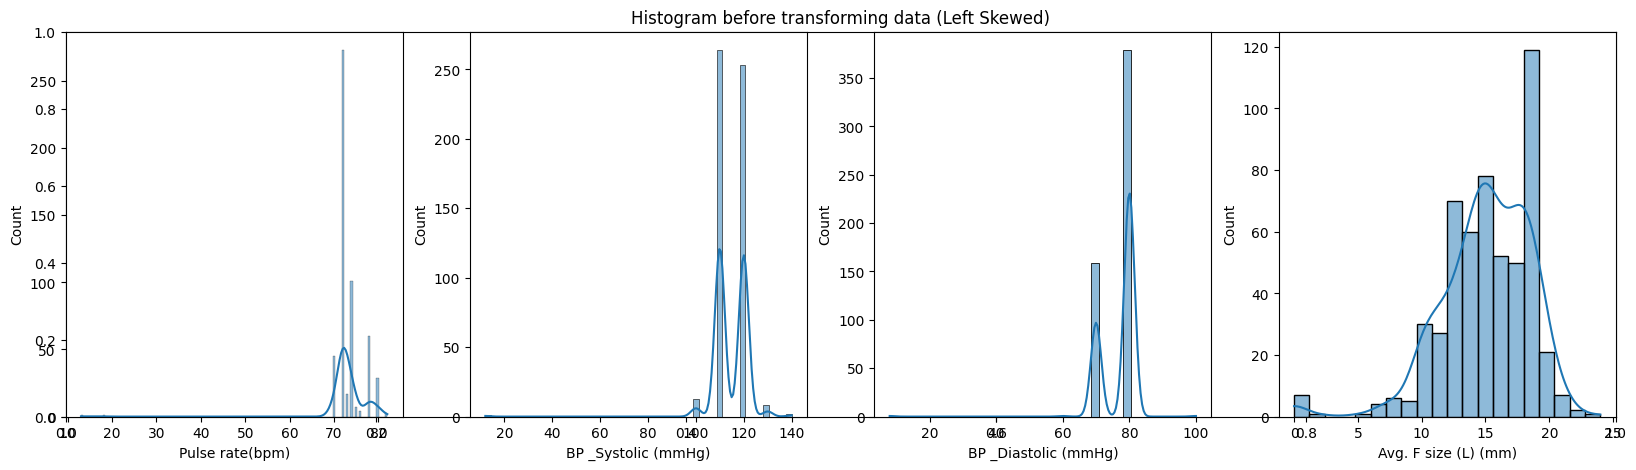

In [16]:
plt.figure(figsize = (20,5))
plt.title("Histogram before transforming data (Left Skewed)")
for i in range (len(negative_skew)):
    plt.subplot(1,4,i+1)
    sns.histplot(x = df[negative_skew.keys()[i]],kde = True)
plt.show()

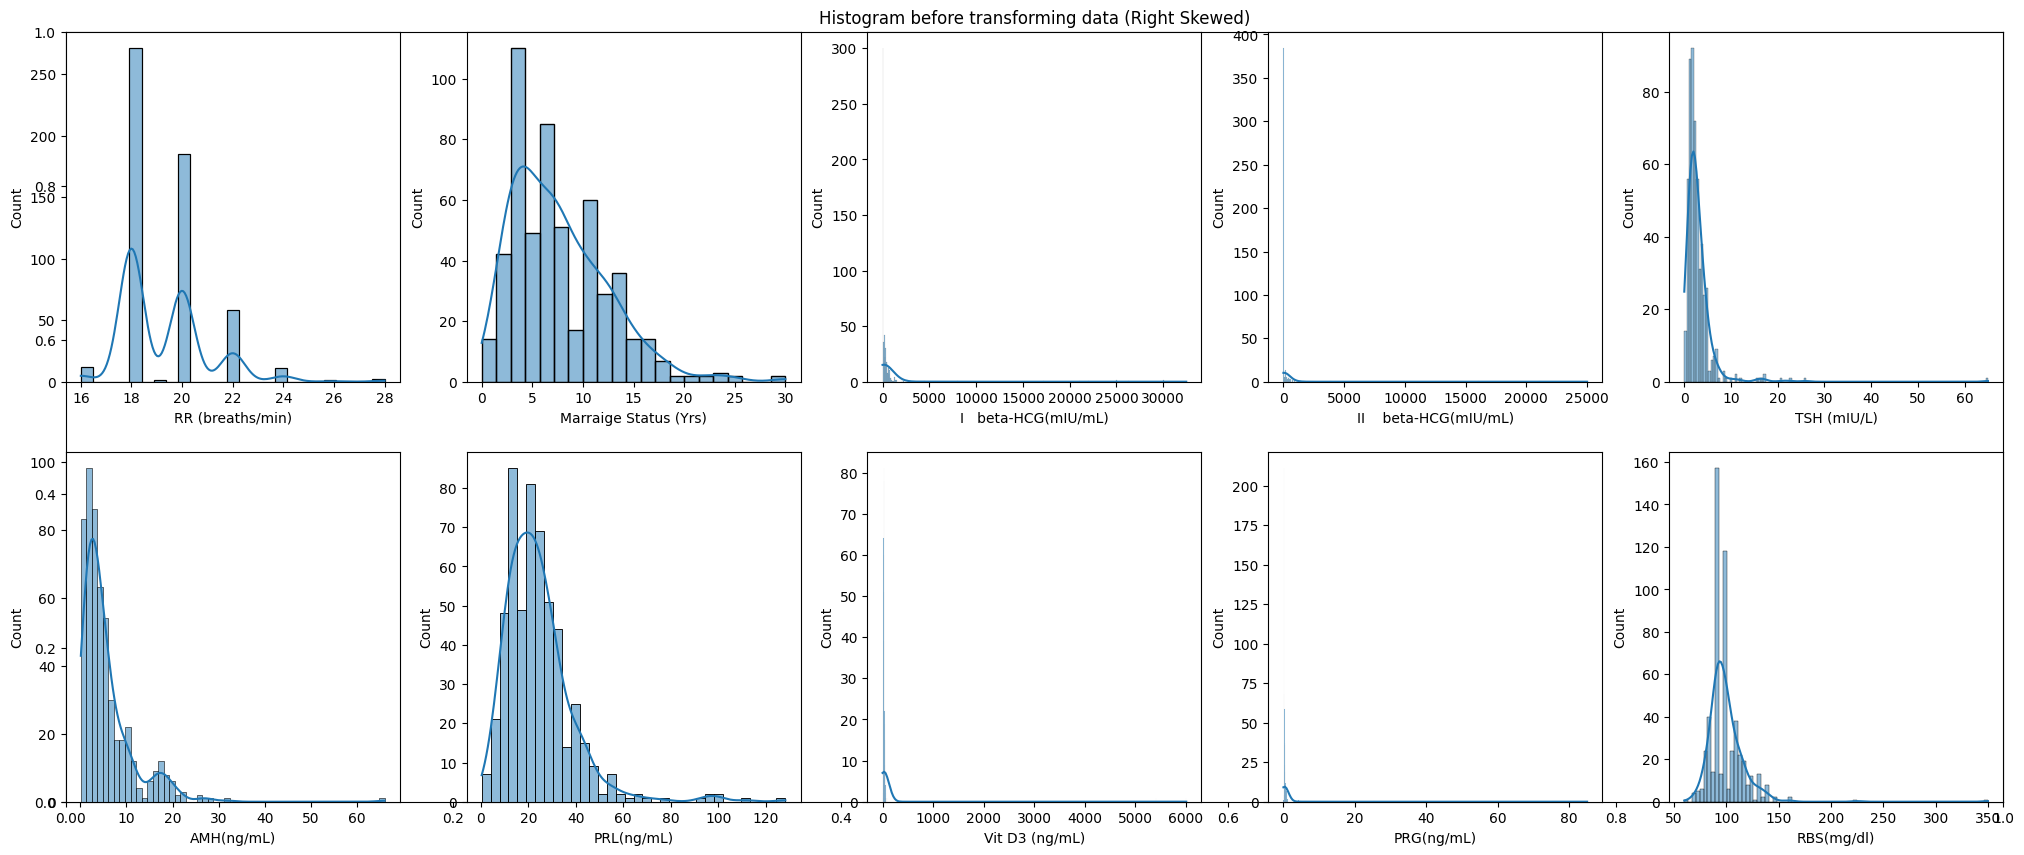

In [17]:
plt.figure(figsize = (25,10))
plt.title("Histogram before transforming data (Right Skewed)")
for i in range (len(positive_skew)):
    plt.subplot(2,5,i+1)
    sns.histplot(x = df[positive_skew.keys()[i]],kde = True)
plt.show()

In [18]:
print(" Skewness Values After Tranformation")
print("-------------------------------------")
df[continous].skew() ## All variables are approximately normally distributed

 Skewness Values After Tranformation
-------------------------------------


Age (yrs)                  0.354004
Weight (Kg)                0.515227
Height(Cm)                 0.325193
BMI                        0.269385
Pulse rate(bpm)           -7.948497
RR (breaths/min)           1.234130
Hb(g/dl)                   0.744115
Marraige Status (Yrs)      1.143231
Cycle length(days)         0.826791
I   beta-HCG(mIU/mL)       7.523336
II    beta-HCG(mIU/mL)    12.808928
Waist:Hip Ratio           -0.349283
Hip(inch)                 -0.200873
Waist(inch)                0.194675
TSH (mIU/L)                9.790706
AMH(ng/mL)                 3.296237
PRL(ng/mL)                 2.441412
Vit D3 (ng/mL)            16.436558
PRG(ng/mL)                20.730654
RBS(mg/dl)                 5.488676
BP _Systolic (mmHg)       -4.845716
BP _Diastolic (mmHg)      -3.884299
Follicle No. (L)           0.944619
Follicle No. (R)           0.785224
Avg. F size (L) (mm)      -1.147341
Avg. F size (R) (mm)      -0.808139
Endometrium (mm)           0.258766
dtype: float64

### discrete variables 

In [19]:
df[discrete].describe()

,Cycle(R/I),No. of aborptions,stressLevel
count,541.000000,541.000000,541.000000
mean,2.560074,0.288355,2.269871
std,0.901950,0.692575,1.304266
min,2.000000,0.000000,1.000000
25%,2.000000,0.000000,1.000000
50%,2.000000,0.000000,2.000000
75%,4.000000,0.000000,3.000000
max,5.000000,5.000000,5.000000


In [20]:
df[discrete].duplicated().sum()

np.int64(506)

`Observation`
- **506 Duplicated records**
- **This can be possible because multiple records may match (can have same Cycle(R/I), No.of abortions, stressLevels)**

### Categorical variables 

In [21]:
df[categorical].describe()

,PCOS (Y/N),Blood Group,Pregnant(Y/N),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),Diabetes,Hypertension,Infertility
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,13.802218,0.380776,0.377079,0.273567,0.306839,0.452865,0.489834,0.514815,0.247689,0.327172,0.316081,0.133087
std,0.469615,1.840812,0.486027,0.485104,0.446202,0.461609,0.498234,0.500359,0.500244,0.432070,0.469615,0.465375,0.339983
min,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


`Observation`
- Blood groups Indications :  **A+ = 11, A- = 12, B+ = 13, B- = 14, O+ = 15, O- = 16, AB+ = 17, AB- = 18**
- Fast food (Y/N) contains one empty value.

In [22]:
df["Blood Group"].replace({11 : "A+" , 12 : "A-" , 13 :  "B+" , 14 :  "B-" , 15 : "O+" , 16 : "O-" , 17 : "AB+" , 18 :  "AB-"},inplace = True)
df['Fast food (Y/N)'].fillna(1,inplace = True)

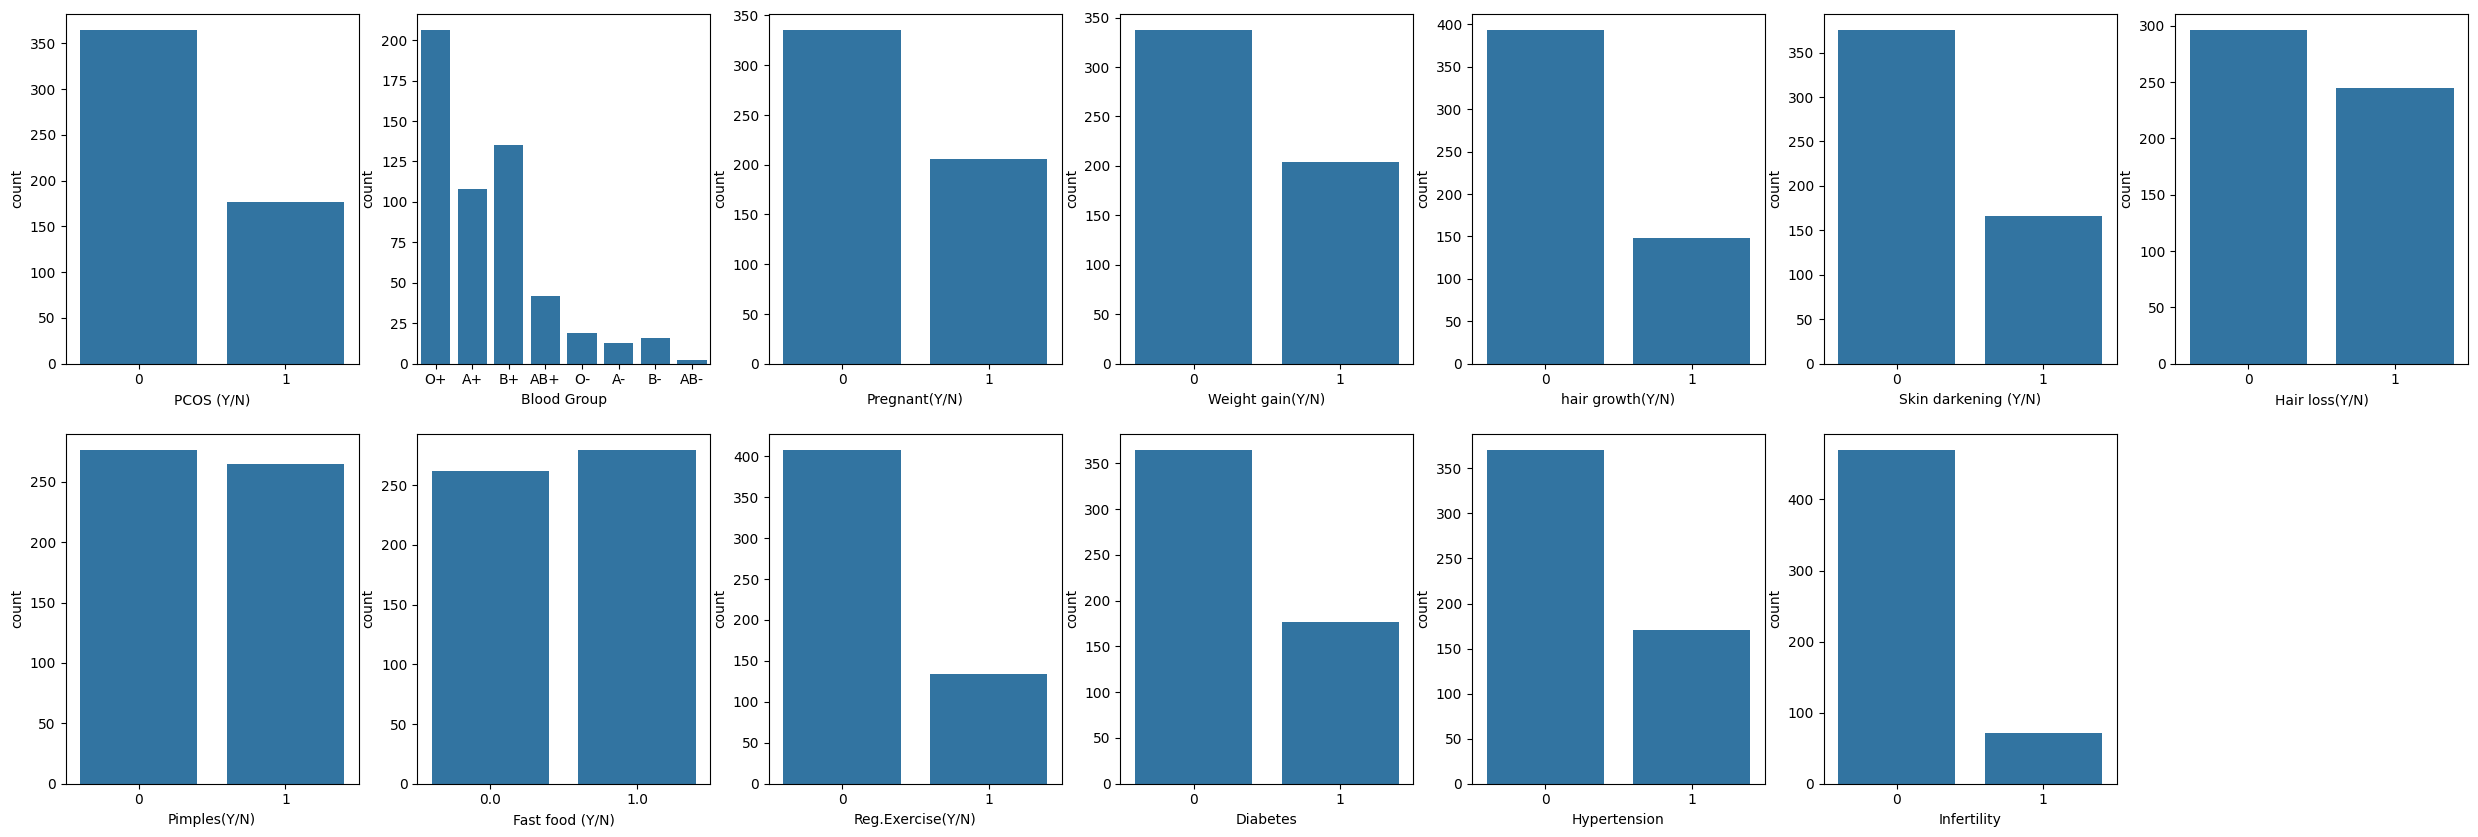

In [23]:
plt.figure(figsize = (31,10))
for i in range (len(categorical)):
    plt.subplot(2,7,i+1)
    sns.countplot(x = df[categorical[i]])
plt.show()

In [24]:
# Encoding Dummy variables
# Merging into Original Data Frame
df = pd.concat([df,pd.get_dummies(df["Blood Group"]).astype(int)],axis = 1)
df.drop(columns = ["Blood Group"],inplace  = True)
df

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Diabetes,Hypertension,Infertility,stressLevel,A+,A-,AB+,AB-,B+,B-,O+,O-
0,0,28,44.6,152.000,19.300000,78,22,10.48,2,5,7.0,0,0,1.99,1.99,36,30,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5,0,0,0,1,0,0,0,0,0,0,1,0
1,0,36,65.0,161.500,24.921163,74,20,11.70,2,5,11.0,1,0,60.80,1.99,38,32,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7,0,0,0,2,0,0,0,0,0,0,1,0
2,1,33,68.8,165.000,25.270891,72,18,11.80,2,5,10.0,1,0,494.08,494.08,40,36,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0,1,1,0,3,1,0,0,0,0,0,0,0
3,0,37,65.0,148.000,29.674945,72,20,12.00,2,5,4.0,0,0,1.99,1.99,42,36,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5,0,0,0,2,0,0,0,0,1,0,0,0
4,0,25,52.0,161.000,20.060954,72,18,10.00,2,5,1.0,1,0,801.45,801.45,37,30,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0,0,0,0,2,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,50.0,164.592,18.500000,72,16,11.00,2,5,8.0,0,1,1.99,1.99,28,26,0.928571,1.11,1.70,5.30,36.6,0.25,92.0,0,0,0,0,0,0.0,0,110,70,1,0,17.5,10.0,6.7,0,0,0,1,0,0,1,0,0,0,0,0
537,0,30,63.2,158.000,25.300000,72,18,10.80,2,5,4.0,1,1,80.13,1.99,34,32,0.941176,2.05,5.60,21.09,23.0,0.25,108.0,1,0,0,0,0,0.0,0,110,70,9,7,19.0,18.0,8.2,0,0,0,2,0,0,0,0,0,0,1,0
538,0,36,54.0,152.000,23.400000,74,20,10.80,2,6,8.0,0,0,1.99,1.99,30,28,0.933333,2.87,3.70,96.41,22.5,0.25,92.0,0,0,0,0,0,0.0,0,110,80,1,0,18.0,9.0,7.3,0,0,0,2,0,0,0,0,1,0,0,0
539,0,27,50.0,150.000,22.200000,74,20,12.00,4,2,2.0,0,0,292.92,1.99,28,26,0.928571,2.50,5.20,38.89,22.4,0.25,115.0,0,0,0,0,1,0.0,0,110,70,7,6,18.0,16.0,11.5,0,0,0,1,0,0,0,0,0,0,1,0


In [25]:
df["PCOS (Y/N)"].value_counts()

PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64

`Observation`

- **No.of Not Diseased are 364**
- **No.of Diseased are 177**
- **Since they are in propotion 1:2.64 , Hence we have to resample data using SMOTE .**

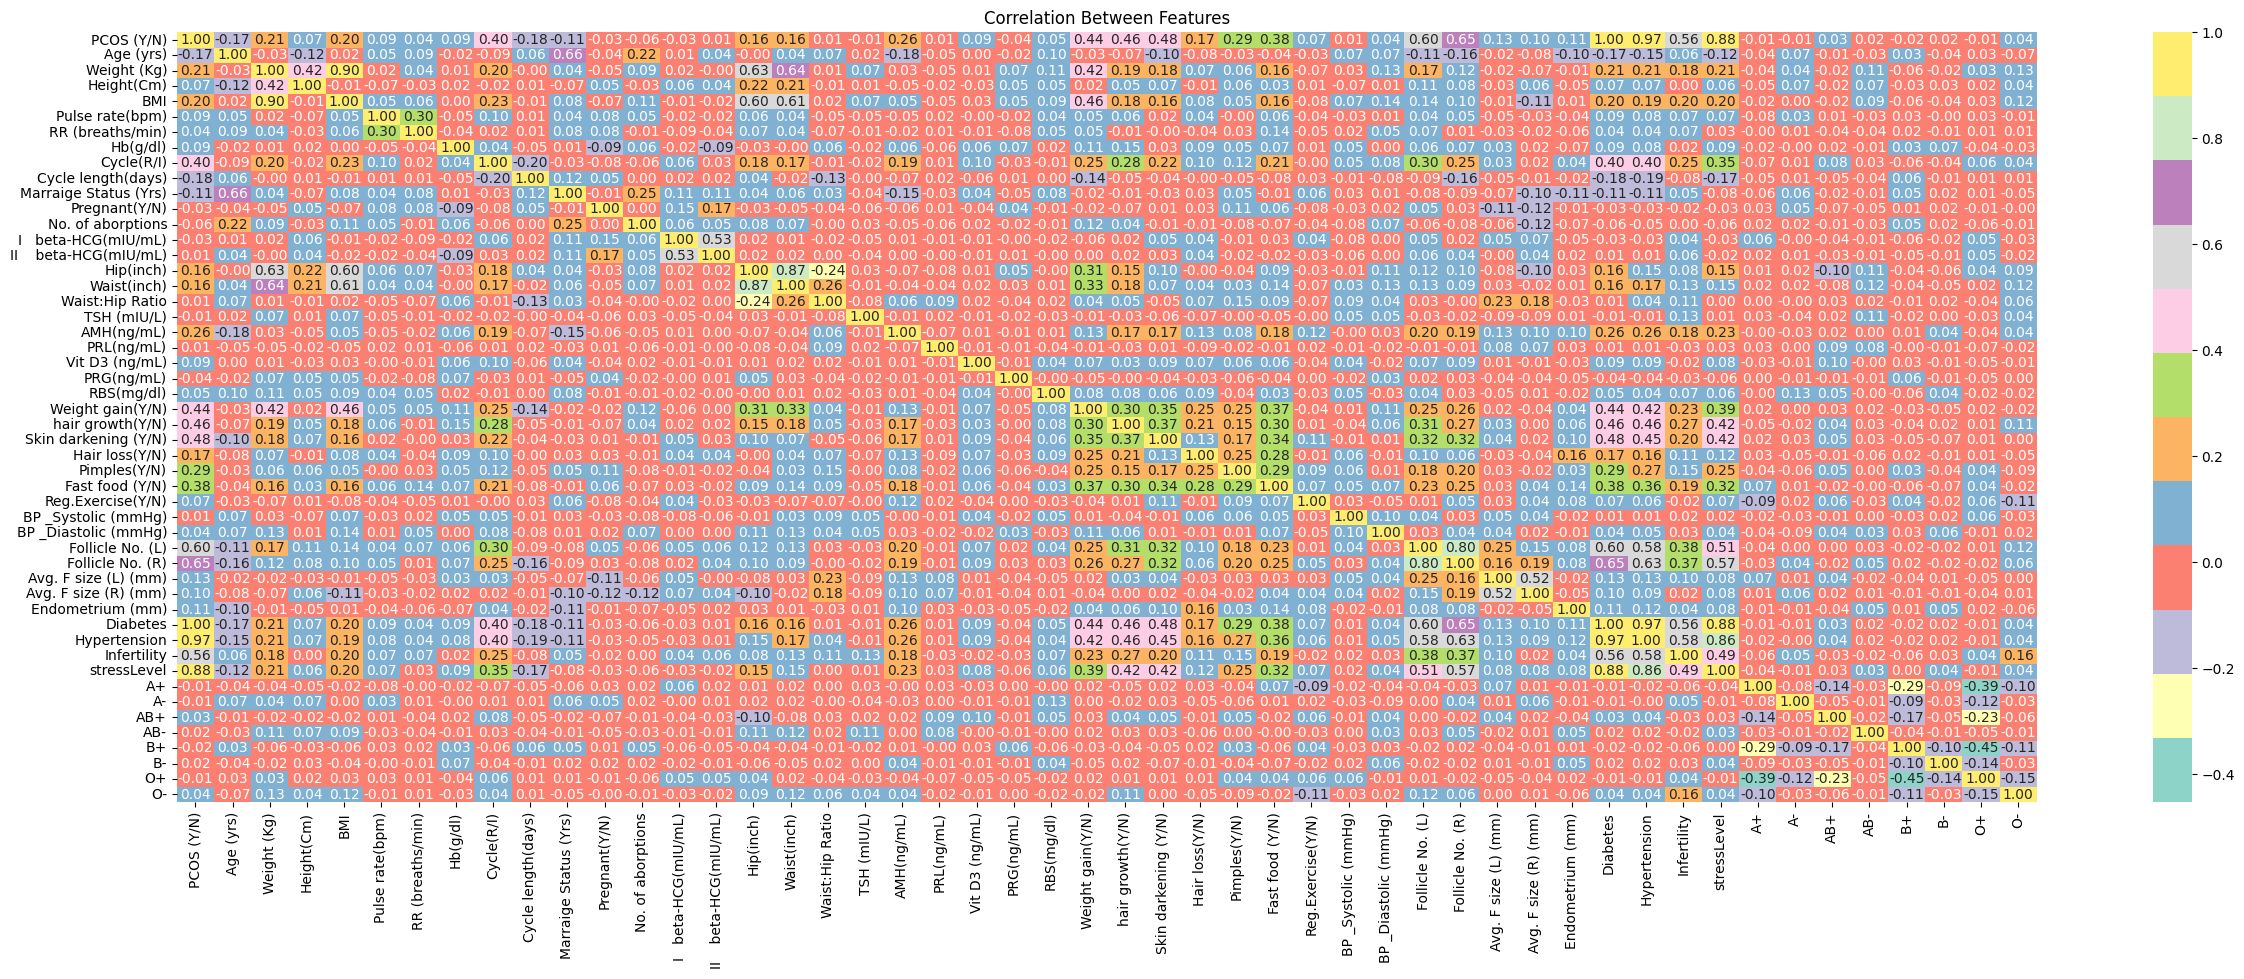

In [26]:
corr_matrix= df.corr(method = 'pearson')
plt.subplots(figsize=(30,10))
sns.heatmap(corr_matrix,cmap="Set3", annot = True, fmt = ".2f");
plt.title("Correlation Between Features")
plt.show()

### Splitting Training and Testing sets

In [27]:
x = df.drop(columns = ["PCOS (Y/N)"])
y = df["PCOS (Y/N)"]

In [29]:
# re sampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 0)
x,y = smote.fit_resample(x,y)

In [30]:
x.shape

(728, 49)

In [31]:
# For best Random State
train_accuracy = []
cv_score = []

for i in range(1,100):
    #from sklearn.model_selection import train_test_split,cross_val_score
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = i)
    #from sklearn.linear_model import LogisticRegression
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    ypred_train = LR.predict(x_train)
    ypred_test = LR.predict(x_test)
    #from sklearn.metrics import accuracy_score
    train_accuracy.append(accuracy_score(y_train,ypred_train))
    cv_score.append(cross_val_score(LR,x_train,y_train,cv = 5,scoring = "accuracy").mean())

scores_df = pd.DataFrame({"train_accuracy" : train_accuracy,"cv_score" : cv_score})
min_scores_df = scores_df[abs(scores_df["train_accuracy"] - scores_df["cv_score"]) <= 0.05]
rs = min_scores_df[min_scores_df["cv_score"] == min_scores_df["cv_score"].max()].index.tolist()[0]
print("best random state : ",rs)

best random state :  38


In [32]:
x_train,x_test,y_train,y_teat = train_test_split(x,y,test_size = 0.2,random_state = 38)

In [33]:
# Converting Non Skewed Data To Skewed Data 
a = x_train[continous].skew()
negative_skew = a[(a[:] <-1)]
positive_skew = a[ (a[:] >1)]
print("        Negatively Skewed ")
print("---------------------------------")
print(negative_skew)
print("\n")
print("        Positively Skewed")
print("---------------------------------")
print(positive_skew)

        Negatively Skewed 
---------------------------------
Pulse rate(bpm)        -8.406836
BP _Systolic (mmHg)    -5.286091
BP _Diastolic (mmHg)   -3.865325
Avg. F size (L) (mm)   -1.432181
dtype: float64


        Positively Skewed
---------------------------------
RR (breaths/min)           1.299389
Marraige Status (Yrs)      1.132600
I   beta-HCG(mIU/mL)       8.272367
II    beta-HCG(mIU/mL)    13.424916
TSH (mIU/L)               10.140625
AMH(ng/mL)                 1.571817
PRL(ng/mL)                 2.354349
Vit D3 (ng/mL)            12.099815
PRG(ng/mL)                21.504594
RBS(mg/dl)                 5.827351
dtype: float64


In [34]:
# Conversion of left skewed to normal
for i in range (len(negative_skew)):
    print(negative_skew.keys().tolist()[i],"   :  ",  pd.DataFrame(boxcox(x_train[negative_skew.keys().tolist()[i]]+0.001)[0])[0].skew())
    
# Conversion
lamdas_negative_skewed= {}
for i in range (len(negative_skew)): 
    x_train[negative_skew.keys().tolist()[i]] , lamdas_negative_skewed[i] = boxcox(x_train[negative_skew.keys().tolist()[i]]+0.001)

Pulse rate(bpm)    :   0.48908356105188666
BP _Systolic (mmHg)    :   0.18248209816387026
BP _Diastolic (mmHg)    :   0.20983698005659387
Avg. F size (L) (mm)    :   -0.6029031846233781


In [35]:
# Conversion of right skewed to normal
for i in range (len(positive_skew)):
    print(positive_skew.keys().tolist()[i],"   :  ",  pd.DataFrame(boxcox(x_train[positive_skew.keys().tolist()[i]]+0.001)[0])[0].skew())
    
#Conversion
lamdas_positive_skewed= {}
for i in range (len(positive_skew)): 
    x_train[positive_skew.keys().tolist()[i]], lamdas_positive_skewed[i] = boxcox(x_train[positive_skew.keys().tolist()[i]]+0.001)

RR (breaths/min)    :   0.0
Marraige Status (Yrs)    :   0.025252124357450126
I   beta-HCG(mIU/mL)    :   0.1315490321929174
II    beta-HCG(mIU/mL)    :   0.6971610027637007
TSH (mIU/L)    :   0.04984546986742435
AMH(ng/mL)    :   -0.017069239682209483
PRL(ng/mL)    :   0.09226172505225648
Vit D3 (ng/mL)    :   -0.3124801614461946
PRG(ng/mL)    :   -0.1484099409939971
RBS(mg/dl)    :   -0.08290475037575372


# Modeling

In [36]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [37]:
print("intercept : ",lr.intercept_)
print("coefficients : ",lr.coef_)

intercept :  [-0.00063421]
coefficients :  [[-9.95289097e-02  9.62429609e-02 -8.22106925e-02  3.38423551e-02
   1.53563736e-07 -1.92085257e-04 -7.76543845e-04  1.71031316e-02
  -3.07344263e-02 -9.67593128e-03 -4.04758725e-03 -5.55482494e-03
   4.41876047e-03 -1.31160144e-04  4.91996991e-03  1.39571818e-03
  -6.10644678e-04  1.77238699e-03  2.12563722e-02 -2.28093385e-03
  -1.50650803e-03 -1.52109910e-03 -3.59135357e-04  1.10105898e-02
   9.73561192e-03  1.06862479e-02  3.37693908e-03  6.26995532e-03
   1.28577518e-02 -8.52032589e-04  6.97544805e-08  6.75706409e-09
   1.58341667e-01  1.82503053e-01  5.51579732e-02  1.01319675e-02
   7.29146296e-03  3.29542623e-02  3.06441865e-02  8.49401205e-03
   7.41184750e-02 -2.81265341e-03 -5.19924352e-04 -1.16086413e-03
  -1.53939519e-05 -2.94521907e-03 -1.44130826e-04 -4.01208710e-03
  -6.43511502e-04]]


# Evaluation

In [38]:
lamdas_negative_skewed

{0: np.float64(4.2706271465694),
 1: np.float64(3.564256260210291),
 2: np.float64(4.372295143456014),
 3: np.float64(1.4623584764647726)}

In [39]:
lamdas_positive_skewed

{0: np.float64(-3.301264106397046),
 1: np.float64(0.36970353420061064),
 2: np.float64(-0.09776299771003036),
 3: np.float64(-0.4873621257853589),
 4: np.float64(0.06387231750985192),
 5: np.float64(0.18870133524993876),
 6: np.float64(0.2901997301975503),
 7: np.float64(-0.4745319549540674),
 8: np.float64(-0.7957791496789184),
 9: np.float64(-1.76394929989357)}

In [40]:
x_test["Pulse rate(bpm)"] = boxcox(x_test["Pulse rate(bpm)"],lmbda = 4.2706271465694)
x_test["BP _Systolic (mmHg)"] = boxcox(x_test["BP _Systolic (mmHg)"],lmbda = 3.564256260210291)
x_test["BP _Diastolic (mmHg)"] = boxcox(x_test["BP _Diastolic (mmHg)"],lmbda = 4.372295143456014)
#x_test["Avg. F size (L) (mm)"] = boxcox(x_test["Avg. F size (L) (mm)"],lmbda = 1.4623584764647726)

x_test["RR (breaths/min)"] = boxcox(x_test["RR (breaths/min)"],lmbda = -3.301264106397046)
x_test["Marraige Status (Yrs)"] = boxcox(x_test["Marraige Status (Yrs)"],lmbda = 0.36970353420061064)
x_test["I   beta-HCG(mIU/mL)"] = boxcox(x_test["I   beta-HCG(mIU/mL)"],lmbda = -0.09776299771003036)
x_test["II    beta-HCG(mIU/mL)"] = boxcox(x_test["II    beta-HCG(mIU/mL)"],lmbda = -0.4873621257853589)
x_test["TSH (mIU/L)"] = boxcox(x_test["TSH (mIU/L)"],lmbda = 0.06387231750985192)
x_test["AMH(ng/mL)"] = boxcox(x_test["AMH(ng/mL)"],lmbda = 0.18870133524993876)
x_test["PRL(ng/mL)"] = boxcox(x_test["PRL(ng/mL)"],lmbda =0.2901997301975503)
x_test["Vit D3 (ng/mL)"] = boxcox(x_test["Vit D3 (ng/mL)"],lmbda = -0.4745319549540674)
x_test["PRG(ng/mL)"] = boxcox(x_test["PRG(ng/mL)"],lmbda = -0.7957791496789184)
x_test["RBS(mg/dl)"] = boxcox(x_test["RBS(mg/dl)"],lmbda = -1.76394929989357)

In [ ]:
ypred_train = lr.predict(x_train)
ypred_test = lr.predict(x_test)

In [42]:
print("train accuracy : ",accuracy_score(y_train,ypred_train))
print("cv score : ",cross_val_score(lr,x_train,y_train,cv = 5,scoring = "accuracy").mean())
print("test accuracy : ",accuracy_score(y_test,ypred_test))

train accuracy :  0.802405498281787
cv score :  0.7921603300913647
test accuracy :  0.815068493150685


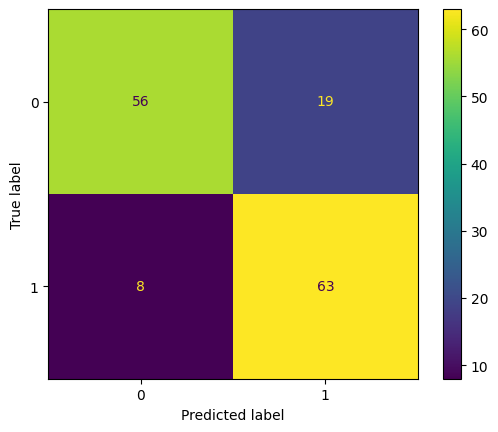

In [43]:
cm = confusion_matrix(y_test,ypred_test)
ConfusionMatrixDisplay(cm,display_labels = [0,1]).plot()
plt.show()

### classification report

In [44]:
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        75
           1       0.77      0.89      0.82        71

    accuracy                           0.82       146
   macro avg       0.82      0.82      0.81       146
weighted avg       0.82      0.82      0.81       146



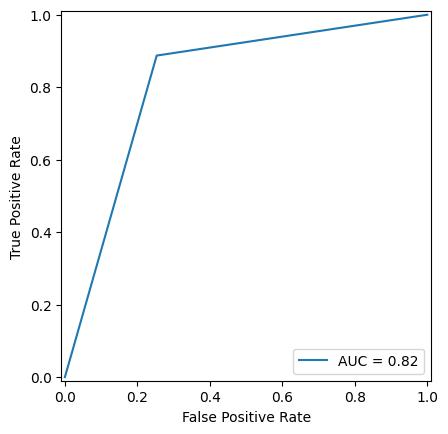

In [45]:
fpr,tpr,thresholds = roc_curve(y_test,ypred_test)
roc_auc = auc(fpr,tpr)
RocCurveDisplay(fpr = fpr,tpr=tpr,roc_auc = roc_auc).plot()
plt.show()

In [47]:
from pickle import dump
dump(lr,open("PCOSpredictor.pkl","wb"))